In [29]:
import numpy as np
from matplotlib import pyplot as plt
#Accion
def do_action(styles, style_number):
  result = np.random.uniform()
  return int(result <= styles[style_number])

In [30]:

def select_action(epsilon, average_rewards):
  #Numero aleatorio, si es menor a epsilon se toma una accion aleatoria, si no se toma la accion con mayor recompensa promedio.
  result = np.random.uniform()
  if result < epsilon:
    return np.random.randint(0, len(average_rewards)) 
  else:
    #Si todo es 0 deberia seleccionar una accion aleatoria
    if np.sum(average_rewards) == 0:
      return np.random.randint(0, len(average_rewards))
    return np.argmax(average_rewards) 

In [31]:
def mab_test(styles, num_iterations, epsilon):

  acum_samples_by_style = {"Iter":[0], "st1":[0], "st2":[0], "st3":[0]}

  total_rewards = [0 for _ in range(len(styles))]
  total_attempts = [0 for _ in range(len(styles))]
  average_rewards = [0.0 for _ in range(len(styles))]

  for iteration in range(num_iterations+1):
    action = select_action(epsilon, average_rewards)
    reward = do_action(styles, action)
    
    # Store result
    total_rewards[action] += reward
    total_attempts[action] += 1
    average_rewards[action] = total_rewards[action] / float(total_attempts[action])
    
    for i in range(len(styles)):
      if i != action:
        acum_samples_by_style["st"+str(i+1)].append(acum_samples_by_style["st"+str(i+1)][-1])
      
    acum_samples_by_style["st"+str(action+1)].append(acum_samples_by_style["st"+str(action+1)][-1]+1)    

    
    if iteration % 100 == 0:
      print('Recompensa promedio por estilos {} es {}'.format(iteration,
                                    ['{:.2f}'.format(elem) for elem in average_rewards]))

  # Print results
  #best_bandit = np.argmax(average_rewards)
  #print('\nEl mejor estilo es {} con una recompensa promedio de  {:.4f}'
  #      .format(best_bandit, average_rewards[best_bandit]))
  #print('En {} episodios las recompensas fueron {}'
  #      .format(num_iterations, sum(total_rewards)))

  plt.figure(figsize=(8,5))
  plt.plot(acum_samples_by_style["st1"], label="Estilo 1")
  plt.plot(acum_samples_by_style["st2"], label="Estilo 2")
  plt.plot(acum_samples_by_style["st3"], label="Estilo 3")
  plt.legend()
  plt.xlabel("Iteraciones")
  plt.ylabel("Numero de veces seleccionado")
  plt.show()

Recompensa promedio por estilos 0 es ['0.00', '1.00', '0.00']
Recompensa promedio por estilos 100 es ['0.50', '0.57', '0.56']
Recompensa promedio por estilos 200 es ['0.52', '0.61', '0.44']
Recompensa promedio por estilos 300 es ['0.50', '0.60', '0.48']
Recompensa promedio por estilos 400 es ['0.51', '0.59', '0.42']
Recompensa promedio por estilos 500 es ['0.53', '0.58', '0.41']
Recompensa promedio por estilos 600 es ['0.51', '0.59', '0.42']
Recompensa promedio por estilos 700 es ['0.50', '0.60', '0.43']
Recompensa promedio por estilos 800 es ['0.51', '0.61', '0.44']
Recompensa promedio por estilos 900 es ['0.55', '0.60', '0.48']
Recompensa promedio por estilos 1000 es ['0.57', '0.60', '0.49']
Recompensa promedio por estilos 1100 es ['0.54', '0.60', '0.53']
Recompensa promedio por estilos 1200 es ['0.53', '0.60', '0.56']
Recompensa promedio por estilos 1300 es ['0.54', '0.60', '0.54']
Recompensa promedio por estilos 1400 es ['0.53', '0.60', '0.54']
Recompensa promedio por estilos 1500 

Recompensa promedio por estilos 5600 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 5700 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 5800 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 5900 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 6000 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 6100 es ['0.58', '0.59', '0.59']
Recompensa promedio por estilos 6200 es ['0.58', '0.59', '0.59']
Recompensa promedio por estilos 6300 es ['0.59', '0.59', '0.59']
Recompensa promedio por estilos 6400 es ['0.59', '0.59', '0.59']
Recompensa promedio por estilos 6500 es ['0.59', '0.59', '0.59']
Recompensa promedio por estilos 6600 es ['0.58', '0.59', '0.58']
Recompensa promedio por estilos 6700 es ['0.59', '0.59', '0.58']
Recompensa promedio por estilos 6800 es ['0.59', '0.59', '0.59']
Recompensa promedio por estilos 6900 es ['0.59', '0.59', '0.59']
Recompensa promedio por estilos 7000 es ['0.59', '0.59', '0.59']
Recompensa promedio por e

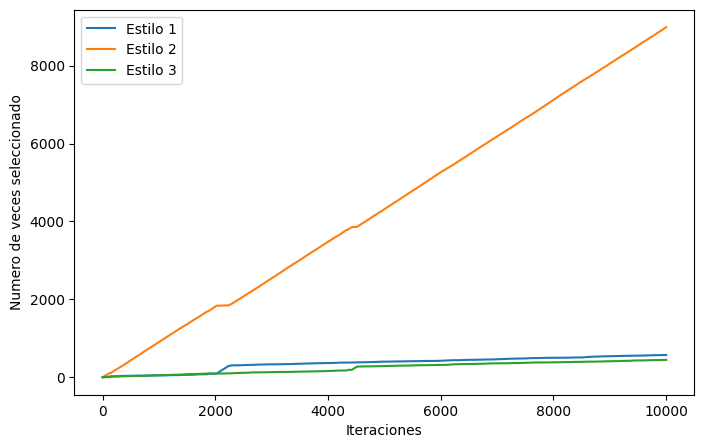

In [40]:
mab_test(styles=[0.55,0.6,0.55], num_iterations=10000, epsilon=0.1)